# CELEBAL ASSIGNMENT 8

# NAME : YASH PRATAP SINGH

# *Loan Approval Prediction:-*

Hello! Lets check approval for loans.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZnfoaUoZZCjTnaWT56VrbRwmuFRYDcfLMzQ&usqp=CAU)

# *About Company:-*

Celebal Technologies is a premier software services company in the field of Data Science, Big Data, and Enterprise Cloud.

# *Problem statement:-*


To automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 

These details are:- Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status.	 

**To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.**

# *Dataset Description:-*

1.LoanID= Unique Loan ID 

2.Gender= Male/ Female 

3.Married= Applicant married (Y/N) 

4.Dependents= Number of dependents 

5.Education= Applicant Education (Graduate/ Under Graduate) 

6.SelfEmployed= Self-employed (Y/N)

7.ApplicantIncome= Applicant income

8.CoapplicantIncome= Coapplicant income

9.LoanAmount= Loan amount in thousands

10.LoanAmountTerm= Term of the loan in months

11.CreditHistory= Credit history meets guidelines 

12.PropertyArea= Urban/ Semi-Urban/ Rural

13.LoanStatus= (Target) Loan approved (Y/N)



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# First Approach :
Features are categorical so I will prefer using tree based classifiers since it select the best feature automatically

# Lets work on Training dataset.......

In [4]:
df=pd.read_csv("Training Dataset.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Dataset contain the following dtypes:-


1.**Int64**:- '**ApplicantIncome**'

2.**Float64**:- '**CoapplicantIncome**', '**LoanAmount**', '**Loan_Amount_Term**', '**Credit_History**'.

3.**Object**:- '**Loan_ID**', '**Gender**', '**Married**', '**Dependents**', '**Education**', '**Self_Employed**', '**Property_Area**', '**Loan_Status**'.



# *Lets check the target variable....*

<AxesSubplot:>

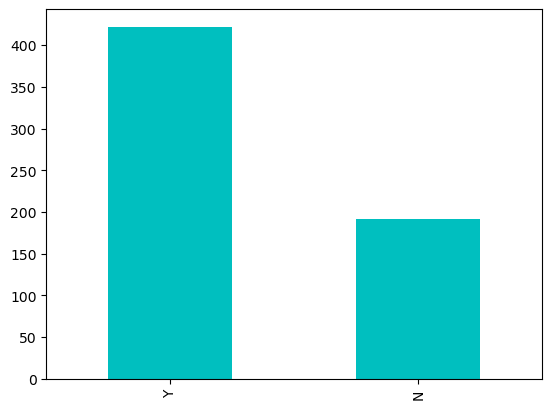

In [8]:
#Counting all unique values of column "Loan_Status" from dataset 

df["Loan_Status"].value_counts().plot(kind='bar',color='c')

# **Observations:-**

From the above plot we get:-

1.Loan_Status(Y) = 422(68.72%) 

2.Loan_Status(N)=192(31.27%)


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

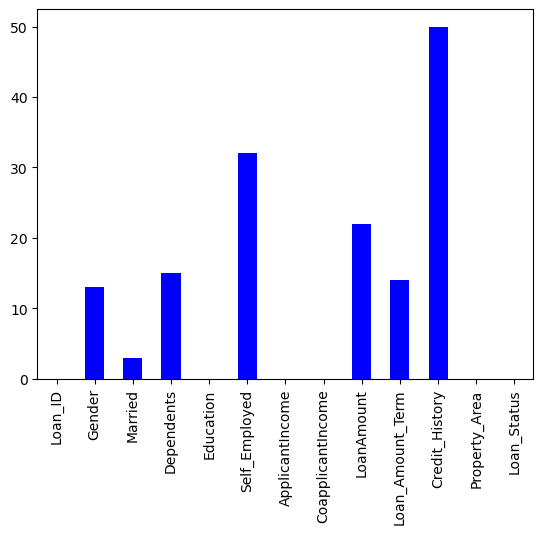

In [10]:
df.isnull().sum().plot(kind='bar',color = 'blue')

# *Observations:-*

Looks like missing values are in


* Gender=               2.1%
* Married=             0.48%
* Dependents=           2.44%
* Self_Employed=        5.21%
* LoanAmount=           3.58%
* Loan_Amount_Term=     2.28%
* Credit_History=       8.14%



# *Observations:-*

1.We can see there are total 13 columns including target variable, all of them are self explanatory.

2.We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns.

# *Lets Handle Missing values* 

In [11]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

<AxesSubplot:>

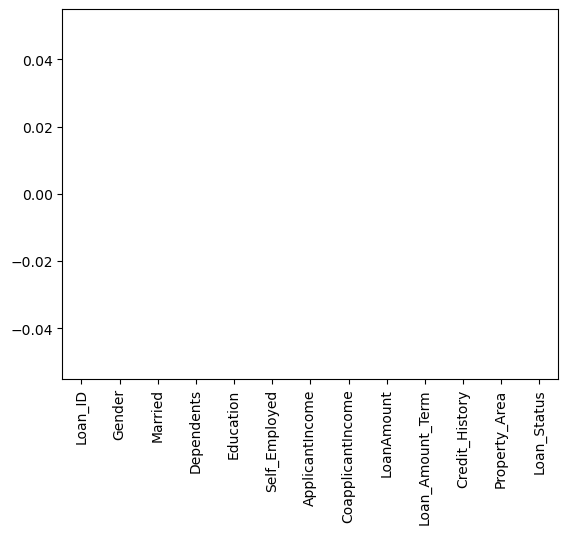

In [13]:
df.isnull().sum().plot(kind='bar',color = 'black')

# *Observation:-*

Zero Missing value left.....

In [14]:
df = df.drop(columns=['Loan_ID']) ## Dropping Loan ID

# *Let's also analyze Categorical Columns:-*

In [15]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']


print("Categorical Columns in training dataset based on datatypes {}".format(categorical_columns))



Categorical Columns in training dataset based on datatypes ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']


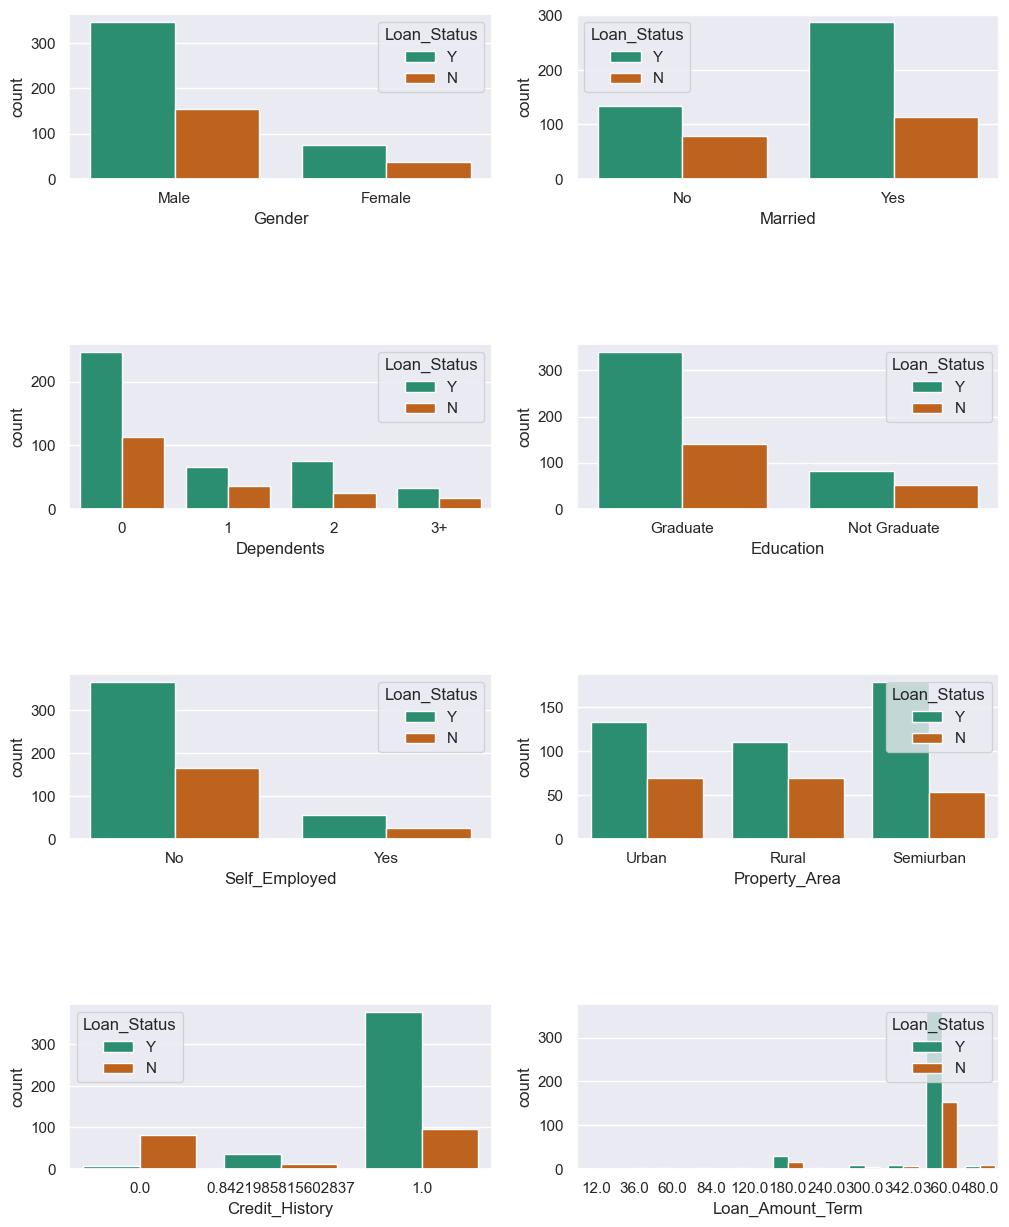

In [16]:
### Data Visualization libraries
sns.set_theme(style="darkgrid")
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col],palette="Dark2")

plt.subplots_adjust(hspace=1)

# *Observations:-*

**Plots above convey following things about the dataset:**

* Loan Approval Status: About 2/3rd of applicants have been granted loan.

* Sex: There are more Men than Women (approx. 3x).

* Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.

* Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.

* Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval.

* Employment: 5/6th of population is not self employed.

* Property Area: More applicants from Semi-urban and also likely to be granted loans.

* Applicant with credit history are far more likely to be accepted.

* Loan Amount Term: Majority of the loans taken are for 360 Months (30 years)

# *Now, let's also analyze Numerical Columns:-*

In [17]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print("Numerical Columns in training dataset based on datatypes {}".format(numerical_columns))      

Numerical Columns in training dataset based on datatypes ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   84.037468
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  129.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


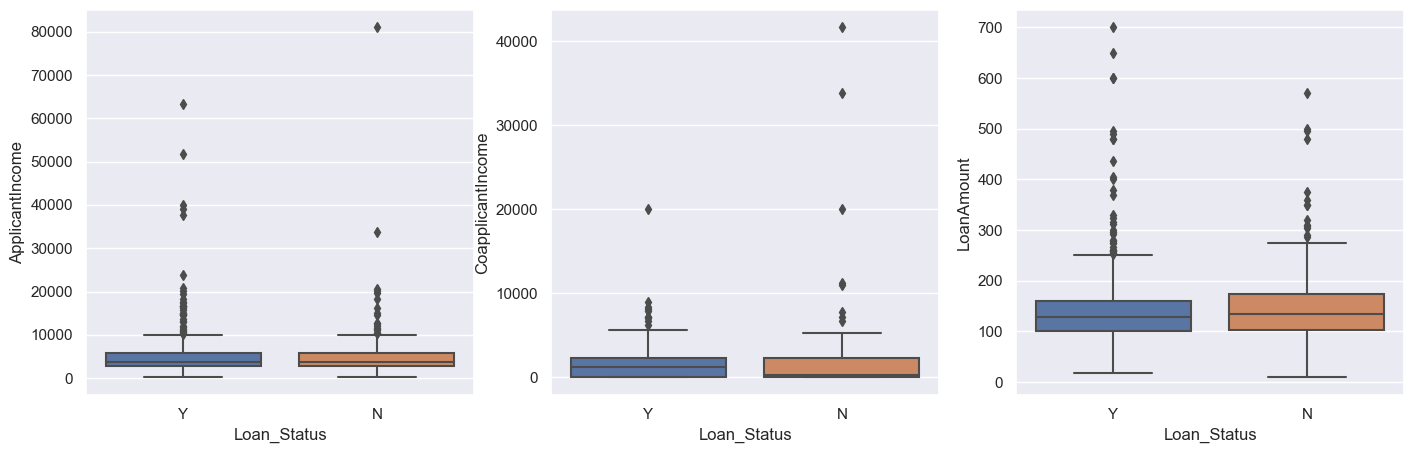

In [18]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

# *Observation:-*
For Numercical Columns, there is no significant relation to Loan approval status.

# *Now lets check the co-relation between variable.*


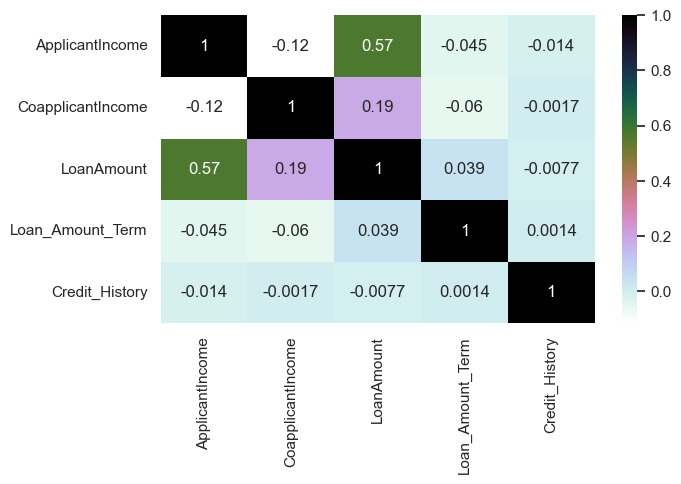

In [19]:
plt.figure(figsize=(7,4)) #7 is the size of the width and 4 is parts.... 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()


# *Preprocessing Data:-*

Input data needs to be pre-processed before we feed it to model. 
Now its time for:-

**Encoding Categorical Features.**

In [20]:
dummy_Gender = pd.get_dummies(df['Gender'], prefix = 'Gender')
dummy_Married = pd.get_dummies(df['Married'], prefix = "Married")
dummy_Education = pd.get_dummies(df['Education'], prefix = "Education")
dummy_Self_Employed = pd.get_dummies(df['Self_Employed'], prefix = "Selfemployed")
dummy_Property_Area = pd.get_dummies(df['Property_Area'], prefix = "Property")
dummy_Dependents = pd.get_dummies(df['Dependents'], prefix = "Dependents")
dummy_Loan_status = pd.get_dummies(df['Loan_Status'], prefix = "Approve")

In [21]:
frames = [df,dummy_Gender,dummy_Married,dummy_Education,dummy_Self_Employed,dummy_Property_Area,dummy_Dependents,dummy_Loan_status]

In [22]:
df_train = pd.concat(frames, axis = 1)

In [23]:
df_train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_N,Approve_Y
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,...,0,0,0,1,1,0,0,0,0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,...,0,1,0,0,0,1,0,0,1,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,...,1,0,0,1,1,0,0,0,0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,...,0,0,0,1,1,0,0,0,0,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,...,0,0,0,1,1,0,0,0,0,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,...,1,0,0,1,0,0,1,0,0,1
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,...,0,0,0,1,1,0,0,0,0,1
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,...,0,0,1,0,0,0,0,1,1,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,...,0,0,0,1,0,0,1,0,0,1
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,...,0,0,1,0,0,1,0,0,1,0


In [24]:
df_train.shape

(614, 29)

In [25]:
df_train = df_train.drop(columns = [ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area','Loan_Status','Approve_N'])

In [26]:
df_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Selfemployed_No', 'Selfemployed_Yes',
       'Property_Rural', 'Property_Semiurban', 'Property_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Approve_Y'],
      dtype='object')

In [27]:
df_train.shape

(614, 21)


# *Observations:-*
*
Now,df_train is quality training input to machine learning algorithm 😁 😁

# *Lets work on testing dataset..*

In [29]:
df=pd.read_csv("Test Dataset.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [30]:
df.shape

(367, 12)

In [31]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Dataset contain the following dtypes:-


1.**Int64**:- '**ApplicantIncome**'

2.**Float64**:- '**CoapplicantIncome**', '**LoanAmount**', '**Loan_Amount_Term**', '**Credit_History**'.

3.**Object**:- '**Loan_ID**', '**Gender**', '**Married**', '**Dependents**', '**Education**', '**Self_Employed**', '**Property_Area**'.

In [33]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<AxesSubplot:>

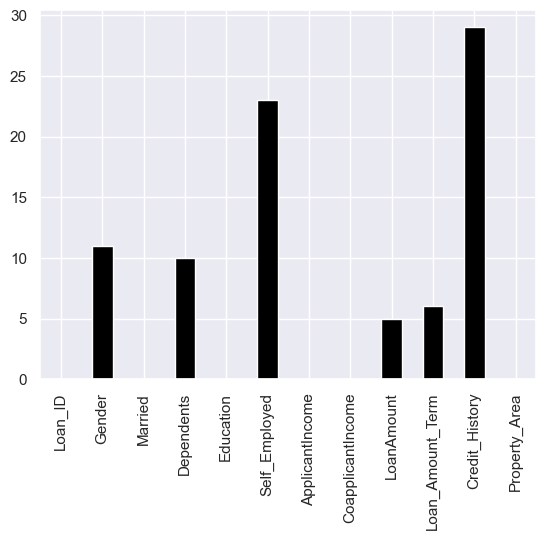

In [34]:
df.isnull().sum().plot(kind='bar',color = 'black')

# *Observations:-*

Looks like missing values are in


* Gender=               2.99%
* Dependents=           2.72%
* Self_Employed=        6.26%
* LoanAmount=           1.36%
* Loan_Amount_Term=     1.63%
* Credit_History=       7.90%

# *Observations:-*

1.We can see there are total 13 columns including target variable, all of them are self explanatory.

2.We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns.

# *Lets Handle Missing values* 

In [35]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [36]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())


<AxesSubplot:>

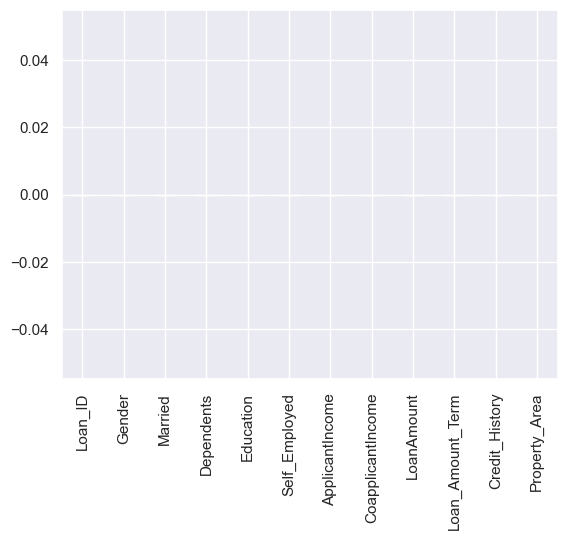

In [37]:
df.isnull().sum().plot(kind='bar',color = 'blue')

# *Observation:-*

Zero Missing value left.....

In [38]:
df = df.drop(columns=['Loan_ID']) ## Dropping Loan ID

In [39]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,60.946040,64.620366,0.364778
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


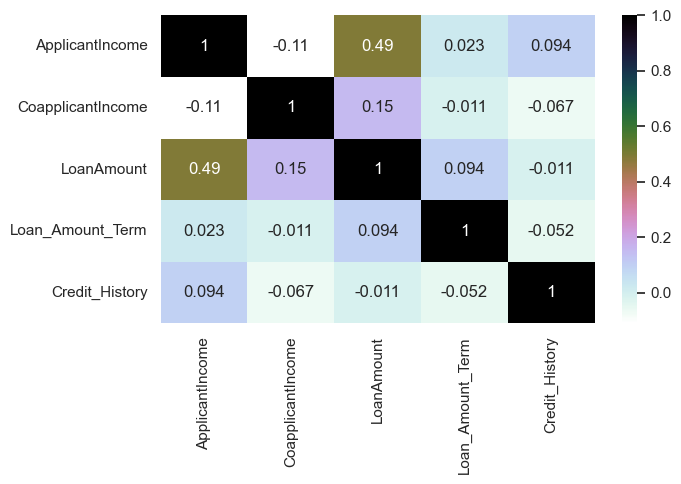

In [40]:
#Checking the correlation...........................
plt.figure(figsize=(7,4)) #7 is the size of the width and 4 is parts.... 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

# *Preprocessing Data:-*

Input data needs to be pre-processed before we feed it to model. 
Now its time for:-

**Encoding Categorical Features.**

In [41]:
dummy_Gender = pd.get_dummies(df['Gender'], prefix = 'Gender')
dummy_Married = pd.get_dummies(df['Married'], prefix = "Married")
dummy_Education = pd.get_dummies(df['Education'], prefix = "Education")
dummy_Self_Employed = pd.get_dummies(df['Self_Employed'], prefix = "Selfemployed")
dummy_Property_Area = pd.get_dummies(df['Property_Area'], prefix = "Property")
dummy_Dependents = pd.get_dummies(df['Dependents'], prefix = "Dependents")




frames = [df,dummy_Gender,dummy_Married,dummy_Education,dummy_Self_Employed,dummy_Property_Area,dummy_Dependents]
df_test = pd.concat(frames, axis = 1)

df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Education_Not Graduate,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,...,0,1,0,0,0,1,1,0,0,0
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,...,0,1,0,0,0,1,0,1,0,0
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,...,0,1,0,0,0,1,0,0,1,0
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,...,0,1,0,0,0,1,0,0,1,0
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,...,1,1,0,0,0,1,1,0,0,0


In [42]:
df_test = df_test.drop(columns = [ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area'])
df_test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Selfemployed_No', 'Selfemployed_Yes',
       'Property_Rural', 'Property_Semiurban', 'Property_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')

In [43]:
df_test.shape

(367, 20)

# Observations:-

Now,df_test is quality training input to machine learning algorithm 😁 😁

In [44]:
df_test.shape

(367, 20)

# Final dataset......

Lets Concatenate the two data set....

In [45]:
Final_df=pd.concat([df_train,df_test],axis=0)
Final_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1.0
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,1,...,1,0,1,0,0,0,1,0,0,0.0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,1,0,0,0,1.0
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1.0
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1.0


In [46]:
Final_df.shape

(981, 21)

In [47]:
Final_df['Approve_Y']

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
362    NaN
363    NaN
364    NaN
365    NaN
366    NaN
Name: Approve_Y, Length: 981, dtype: float64

<AxesSubplot:>

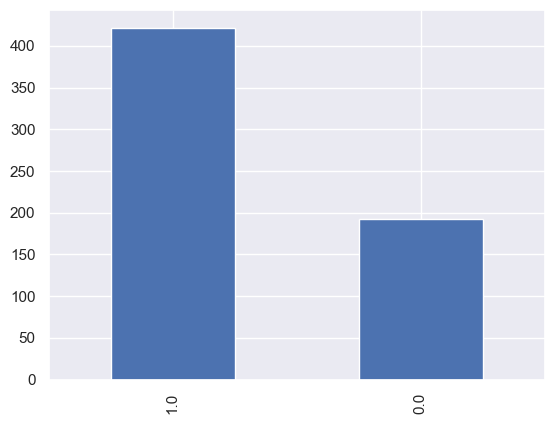

In [48]:
Final_df['Approve_Y'].value_counts().plot(kind='bar')

In [49]:
Final_df["Approve_Y"].isna().sum()

367

In [50]:
Train_df=Final_df.iloc[:614,:]
Test_df=Final_df.iloc[614:,:]

In [51]:
Train_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1.0
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,1,...,1,0,1,0,0,0,1,0,0,0.0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,1,0,0,0,1.0
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1.0
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1.0


In [52]:
Train_df.shape

(614, 21)

In [53]:
Test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_Y
0,5720,0.0,110.0,360.0,1.000000,0,1,0,1,1,...,1,0,0,0,1,1,0,0,0,NaN
1,3076,1500.0,126.0,360.0,1.000000,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,NaN
2,5000,1800.0,208.0,360.0,1.000000,0,1,0,1,1,...,1,0,0,0,1,0,0,1,0,NaN
3,2340,2546.0,100.0,360.0,0.825444,0,1,0,1,1,...,1,0,0,0,1,0,0,1,0,NaN
4,3276,0.0,78.0,360.0,1.000000,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,NaN


In [54]:
Test_df.shape

(367, 21)

In [55]:
X_train=Train_df.drop(['Approve_Y'],axis=1)
y_train=Train_df['Approve_Y']

In [56]:
X_train.shape

(614, 20)

In [57]:
y_train.shape

(614,)

# *Prediciton and selecting the right algorithm..*

In [58]:
from sklearn.linear_model import LogisticRegression ,Lasso
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier

In [59]:
# =============================================================================
# Cross validation on differnet set of algorithm!!!
# =============================================================================
################################################################
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(LogisticRegression(random_state = rs))
clrs.append(ExtraTreesClassifier(random_state = rs))


cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","Logistic Regression","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier']})

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.778409        0.037567  RandomForestClassifier
1              0.773603        0.034709     Logistic Regression
2              0.778495        0.032646      AdaBoostClassifier
3              0.785095        0.051307       Gradient Boosting
4              0.742695        0.037110    ExtraTreesClassifier


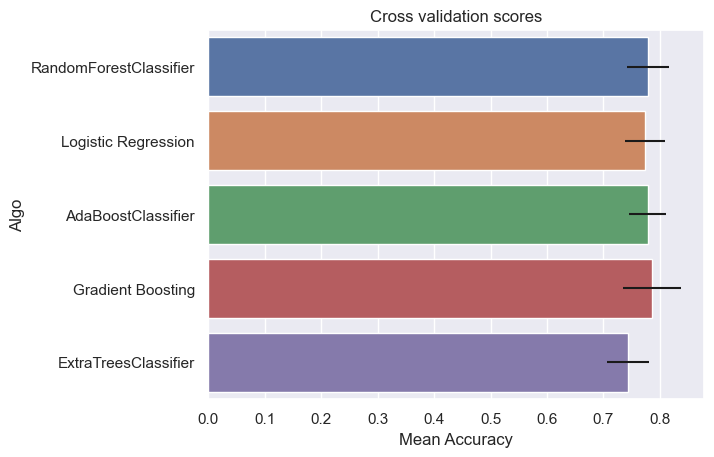

In [60]:
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
print(cv_df)

# As per above scores *Gradient Boosting* seems to be performing well hence will go with the hypertunning for these classifiers.


   **CrossVal_Score_Means**   **CrossValerrors**                     **Algo**
   
0        -      0.778409   -     0.037567 - RandomForestClassifier

1          -    0.773603    -    0.034709   -  Logistic Regression

2          -    0.778495   -     0.032646   -   AdaBoostClassifier

3      -        0.785095    -    0.051307    -   Gradient Boosting

4         -     0.742695 -       0.037110   - ExtraTreesClassifier



Lets take **"Gradient Boosting"**,**"RandomForestClassifier"**,**"Logistic Regression"**


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=4)

In [62]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)

gsGBC.fit(X_train,y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_,gsGBC.best_params_

(0.7108011634056055,
 {'learning_rate': 0.05,
  'loss': 'deviance',
  'max_depth': 8,
  'max_features': 0.3,
  'min_samples_leaf': 100,
  'n_estimators': 200})

In [63]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [2, 3],
              "min_samples_split": [7, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}



rf_param_grid = { 
    'max_features':['auto'], 'oob_score':[True], 'random_state':[1],
    "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5], "min_samples_split" : [ 4, 10 ], "n_estimators": [ 100, 400, 700]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_, gsRFC.best_params_

(0.8127313590692755,
 {'criterion': 'gini',
  'max_features': 'auto',
  'min_samples_leaf': 5,
  'min_samples_split': 4,
  'n_estimators': 100,
  'oob_score': True,
  'random_state': 1})

In [64]:
# Logistic regression Parameters tunning 
LRClr = LogisticRegression()


## Search grid for optimal parameters
LRClr_param_grid = {'penalty':['l2','l1'],'C':[1,10,100],'random_state':[rs]}

gsLRClr=GridSearchCV(LRClr,param_grid = LRClr_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)



gsLRClr.fit(X_train,y_train)

LRClr_best = gsLRClr.best_estimator_

# Best score
gsLRClr.best_score_, gsLRClr.best_params_

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErr

(0.8046007403490216, {'C': 1, 'penalty': 'l2', 'random_state': 15})

# After Hyper parameter tunning...We get

1. Gradient boosting tunning-0.7128172924378635

2. RFC Parameters tunning-0.8127313590692755

3. Logistic regression Parameters tunning-0.8046007403490216

# Second Approach :

'''Hypertunning doesn't seem to be helping much for above case so will perform PCA and see if accuracy improves or not'''....

->Checking the important variables using PCA....


In [65]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)

array([[-2.07879305e+03, -1.65764264e+03,  2.20179845e+01, ...,
        -3.73205437e-16, -4.59033664e-17,  1.43649843e-16],
       [-2.47461923e+03,  1.34727855e+03,  9.03637637e+00, ...,
        -1.70451302e-16, -1.87794175e-16,  2.09147056e-16],
       [-2.81203969e+03,  3.23980679e+02, -6.47016844e+00, ...,
         2.45891169e-17, -2.32175832e-16,  2.56248997e-16],
       ...,
       [ 1.64045978e+03, -1.47148238e+03,  3.45830830e-01, ...,
         5.74796457e-17,  7.53796078e-17, -7.37534528e-17],
       [-1.19116432e+03, -8.76621339e+02, -2.97100355e+01, ...,
         5.43692574e-17, -7.54665508e-17, -3.03244460e-17],
       [-3.80744942e+03,  7.24690795e+03, -1.63947387e+01, ...,
        -1.05478156e-18, -4.05350196e-18,  1.60904974e-17]])

In [66]:
#covariance
covariance=pca.get_covariance()

In [67]:
explained_variance=pca.explained_variance_
explained_variance

array([4.37427561e+07, 5.86545030e+06, 4.75532376e+03, 3.87444854e+03,
       5.78603703e-01, 3.78789550e-01, 3.34662905e-01, 2.94748007e-01,
       2.65912095e-01, 2.23659878e-01, 2.03987704e-01, 1.55644512e-01,
       1.20717664e-01, 9.52500373e-02, 4.81144695e-32, 2.51926412e-32,
       1.69864460e-32, 1.47571908e-32, 8.68755569e-33, 3.10879449e-33])

In [68]:
len(explained_variance)

20

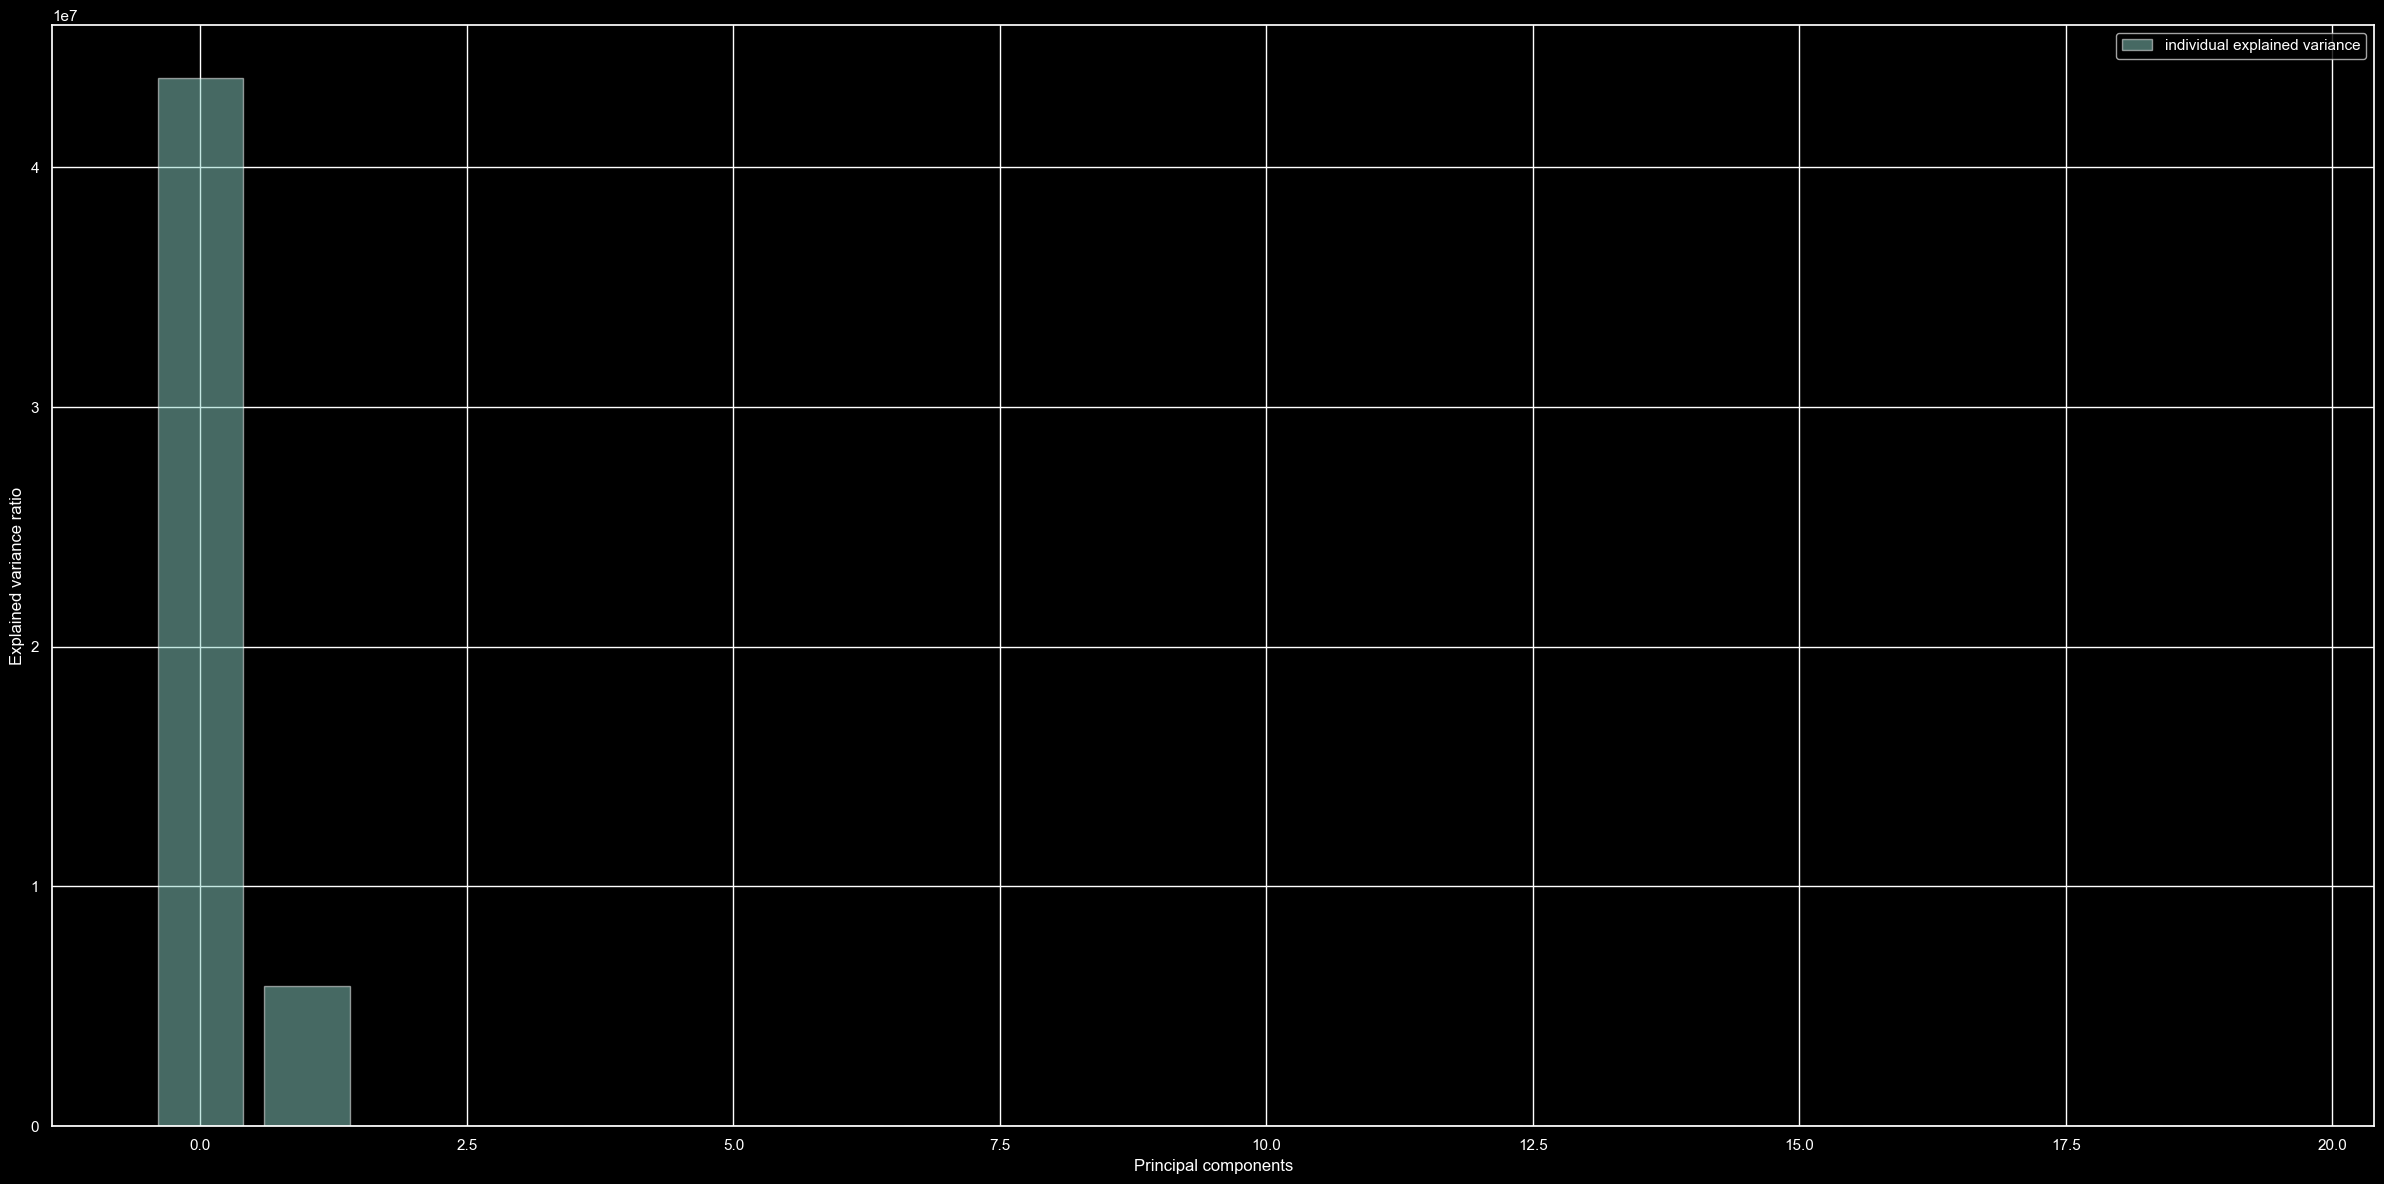

In [69]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(24, 12))
    
    plt.bar(range(20), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

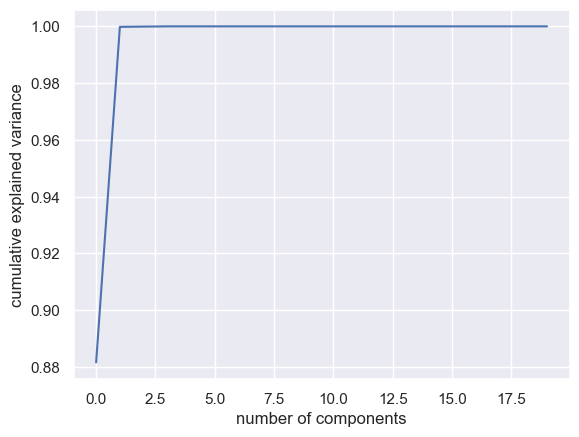

In [70]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

->We can see that the last 2 components has less amount of variance .Performing PCA by taking 18 components with maximum Variance.

In [71]:
pca=PCA(n_components=18)
pca.fit_transform(X_train)


array([[-2.07879305e+03, -1.65764264e+03,  2.20179845e+01, ...,
         6.56171410e-17,  1.78986295e-17, -3.73205437e-16],
       [-2.47461923e+03,  1.34727855e+03,  9.03637637e+00, ...,
         4.51250022e-17, -1.03291981e-16, -1.70451302e-16],
       [-2.81203969e+03,  3.23980679e+02, -6.47016844e+00, ...,
         2.51943911e-16, -1.98597164e-16,  2.45891169e-17],
       ...,
       [ 1.64045978e+03, -1.47148238e+03,  3.45830830e-01, ...,
         2.63336362e-17,  8.66145035e-17,  5.74796457e-17],
       [-1.19116432e+03, -8.76621339e+02, -2.97100355e+01, ...,
        -3.10218943e-18, -1.03006784e-16,  5.43692574e-17],
       [-3.80744942e+03,  7.24690795e+03, -1.63947387e+01, ...,
         7.75965954e-17, -4.34821544e-17, -1.05478156e-18]])

In [72]:

rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(LogisticRegression(random_state = rs))
clrs.append(ExtraTreesClassifier(random_state = rs))


cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","Logistic Regression","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier']})

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.798585        0.048382  RandomForestClassifier
1              0.790323        0.045220     Logistic Regression
2              0.808666        0.033513      AdaBoostClassifier
3              0.804601        0.043979       Gradient Boosting
4              0.772078        0.037764    ExtraTreesClassifier


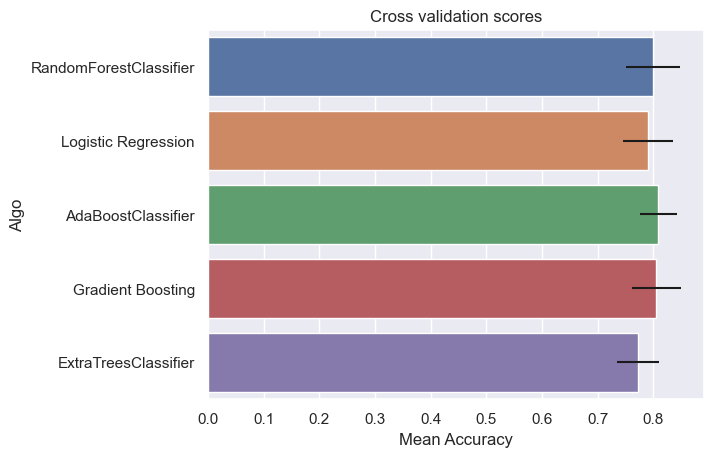

In [73]:
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
print(cv_df)

# Accuracy seems not to be improving even after implementation of PCA

# ------------------------------------------------------------------------

# Third Approach :
Even though tree based classifiers select features with more information gain automatically, but anyway I will try to reduce features manually by with implementation of chi-square and will see if accuracy improves or not.

In [75]:
#Training dataset....
df1=pd.read_csv("Training Dataset.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:>

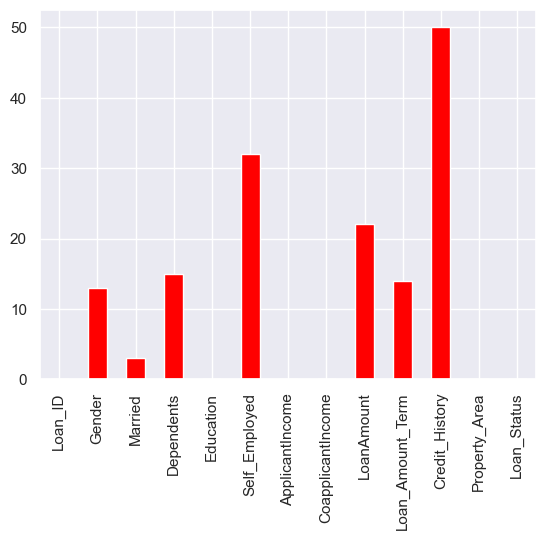

In [76]:
df1.isnull().sum().plot(kind='bar',color = 'red')

In [77]:
#Lets handle its missing values
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].mean())
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean())
df1['LoanAmount']=df1['LoanAmount'].fillna(df1['LoanAmount'].mean())
df1['Dependents']=df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Gender']=df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married']=df1['Married'].fillna(df1['Married'].mode()[0])
df1['Self_Employed']=df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])

<AxesSubplot:>

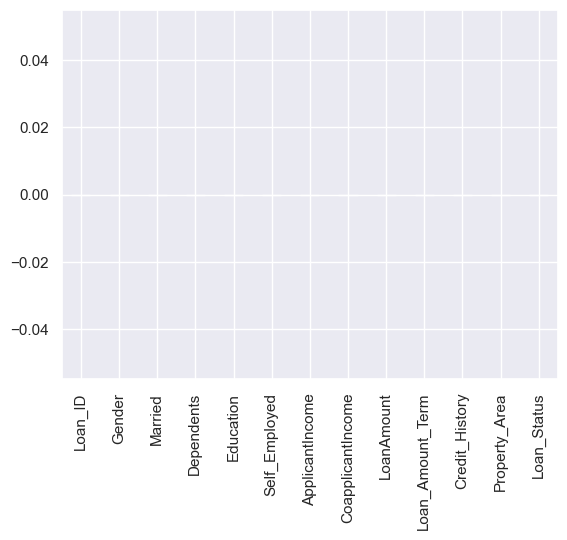

In [78]:
df1.isnull().sum().plot(kind='bar',color = 'GREEN')

In [79]:
df1 = df1.drop(columns=['Loan_ID']) ## Dropping Loan ID

In [82]:
#Testing dataset....
df2=pd.read_csv("Test Dataset.csv")
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


<AxesSubplot:>

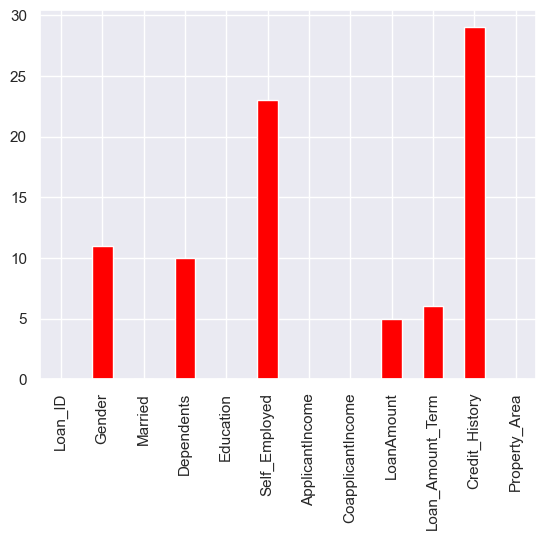

In [83]:
df2.isnull().sum().plot(kind='bar',color = 'red')

In [84]:
df2['Gender']=df2['Gender'].fillna(df2['Gender'].mode()[0])
df2['Dependents']=df2['Dependents'].fillna(df2['Dependents'].mode()[0])
df2['Self_Employed']=df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0])
df2['LoanAmount']=df2['LoanAmount'].fillna(df2['LoanAmount'].mean())
df2['Loan_Amount_Term']=df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mean())
df2['Credit_History']=df2['Credit_History'].fillna(df2['Credit_History'].mean())

<AxesSubplot:>

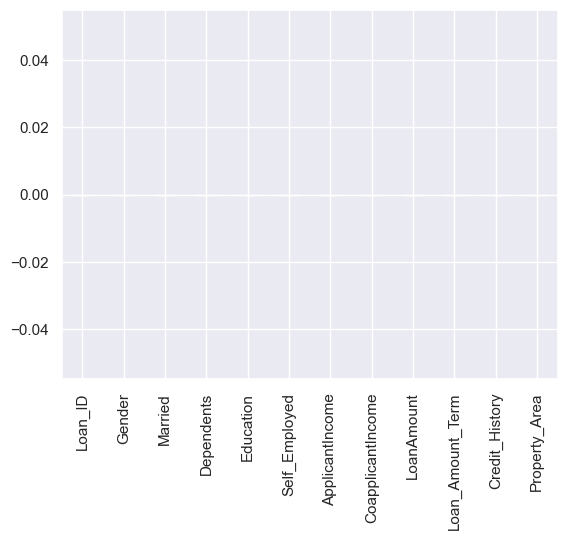

In [85]:
df2.isnull().sum().plot(kind='bar',color = 'Green')

In [86]:
## Dropping Loan ID
df2=df2.drop(columns=['Loan_ID']) 

In [87]:
data=pd.concat([df1,df2],axis=0) 

In [88]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [89]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [90]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.data = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.data[colX].astype(str)
        Y = self.data[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


In [91]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [92]:
#Initialize ChiSquare Class
cT = ChiSquare(data)

#Feature Selection
testColumns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
      
       
for var in testColumns:
    cT.TestIndependence(colX=var,colY="Loan_Status" )

Gender is NOT an important predictor. (Discard Gender from model)
Married is NOT an important predictor. (Discard Married from model)
Dependents is NOT an important predictor. (Discard Dependents from model)
Education is NOT an important predictor. (Discard Education from model)
Self_Employed is NOT an important predictor. (Discard Self_Employed from model)
ApplicantIncome is NOT an important predictor. (Discard ApplicantIncome from model)
CoapplicantIncome is NOT an important predictor. (Discard CoapplicantIncome from model)
LoanAmount is NOT an important predictor. (Discard LoanAmount from model)
Loan_Amount_Term is IMPORTANT for Prediction
Credit_History is IMPORTANT for Prediction
Property_Area is IMPORTANT for Prediction
Loan_Status is IMPORTANT for Prediction


In [93]:
#Drop insignficant variables

data.drop(columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],inplace = True)

In [94]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
    
    #Now one hot encoding
data=pd.get_dummies(data, columns=["Loan_Amount_Term","Credit_History","Property_Area"],drop_first=False)

In [95]:
data.head()

,Loan_Status,Loan_Amount_Term_0,Loan_Amount_Term_1,Loan_Amount_Term_2,Loan_Amount_Term_3,Loan_Amount_Term_4,Loan_Amount_Term_5,Loan_Amount_Term_6,Loan_Amount_Term_7,Loan_Amount_Term_8,...,Loan_Amount_Term_11,Loan_Amount_Term_12,Loan_Amount_Term_13,Credit_History_0,Credit_History_1,Credit_History_2,Credit_History_3,Property_Area_0,Property_Area_1,Property_Area_2
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [96]:
data.columns

Index(['Loan_Status', 'Loan_Amount_Term_0', 'Loan_Amount_Term_1',
       'Loan_Amount_Term_2', 'Loan_Amount_Term_3', 'Loan_Amount_Term_4',
       'Loan_Amount_Term_5', 'Loan_Amount_Term_6', 'Loan_Amount_Term_7',
       'Loan_Amount_Term_8', 'Loan_Amount_Term_9', 'Loan_Amount_Term_10',
       'Loan_Amount_Term_11', 'Loan_Amount_Term_12', 'Loan_Amount_Term_13',
       'Credit_History_0', 'Credit_History_1', 'Credit_History_2',
       'Credit_History_3', 'Property_Area_0', 'Property_Area_1',
       'Property_Area_2'],
      dtype='object')

In [97]:
#Rearranged the order of the dataframe....
data = data[['Loan_Amount_Term_0', 'Loan_Amount_Term_1',
       'Loan_Amount_Term_2', 'Loan_Amount_Term_3', 'Loan_Amount_Term_4',
       'Loan_Amount_Term_5', 'Loan_Amount_Term_6', 'Loan_Amount_Term_7',
       'Loan_Amount_Term_8', 'Loan_Amount_Term_9', 'Loan_Amount_Term_10',
       'Loan_Amount_Term_11', 'Loan_Amount_Term_12', 'Loan_Amount_Term_13',
       'Credit_History_0', 'Credit_History_1', 'Credit_History_2',
       'Credit_History_3', 'Property_Area_0', 'Property_Area_1',
       'Property_Area_2','Loan_Status']]
data.head()

,Loan_Amount_Term_0,Loan_Amount_Term_1,Loan_Amount_Term_2,Loan_Amount_Term_3,Loan_Amount_Term_4,Loan_Amount_Term_5,Loan_Amount_Term_6,Loan_Amount_Term_7,Loan_Amount_Term_8,Loan_Amount_Term_9,...,Loan_Amount_Term_12,Loan_Amount_Term_13,Credit_History_0,Credit_History_1,Credit_History_2,Credit_History_3,Property_Area_0,Property_Area_1,Property_Area_2,Loan_Status
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1


In [98]:
#Separating features and label
X=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

In [99]:
rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(LogisticRegression(random_state = rs))
clrs.append(ExtraTreesClassifier(random_state = rs))


cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","Logistic Regression","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier']})

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.798585        0.048382  RandomForestClassifier
1              0.790323        0.045220     Logistic Regression
2              0.808666        0.033513      AdaBoostClassifier
3              0.804601        0.043979       Gradient Boosting
4              0.772078        0.037764    ExtraTreesClassifier


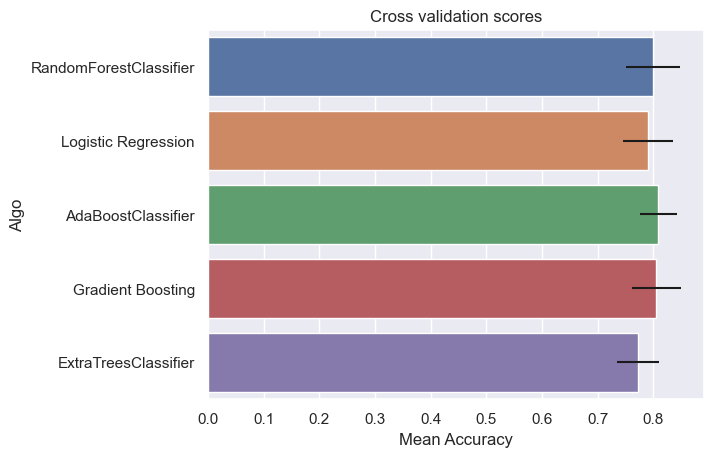

In [100]:
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
print(cv_df)

# Final Ananysis......

Overall AdaBoostClassifier and Gradient Boosting is performing better with few hypertunning.Further I will Use AdaBoostClassifier and Gradient Boosting for predictions with the best set of parameters we got above while hypertunning with grid search....

# Training dataset....

In [103]:
#Training dataset....
df1=pd.read_csv("Training Dataset.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [104]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [105]:
#Lets handle its missing values
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].mean())
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean())
df1['LoanAmount']=df1['LoanAmount'].fillna(df1['LoanAmount'].mean())
df1['Dependents']=df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Gender']=df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married']=df1['Married'].fillna(df1['Married'].mode()[0])
df1['Self_Employed']=df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])

In [106]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Testing dataset.....

In [107]:
df2=pd.read_csv("Test Dataset.csv")
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [108]:
df2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [109]:
df2['Gender']=df2['Gender'].fillna(df2['Gender'].mode()[0])
df2['Dependents']=df2['Dependents'].fillna(df2['Dependents'].mode()[0])
df2['Self_Employed']=df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0])
df2['LoanAmount']=df2['LoanAmount'].fillna(df2['LoanAmount'].mean())
df2['Loan_Amount_Term']=df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mean())
df2['Credit_History']=df2['Credit_History'].fillna(df2['Credit_History'].mean())

In [110]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [111]:
data=pd.concat([df1,df2],axis=0) 

In [112]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [113]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [114]:
#Drop insignficant variables
data = data.drop(columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])


In [115]:
data.head()

,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,360.0,1.0,Urban,Y
1,360.0,1.0,Rural,N
2,360.0,1.0,Urban,Y
3,360.0,1.0,Urban,Y
4,360.0,1.0,Urban,Y


In [116]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
    
    #Now one hot encoding
data=pd.get_dummies(data, columns=["Loan_Amount_Term","Credit_History","Property_Area"],drop_first=False)

In [117]:
data.head()

,Loan_Status,Loan_Amount_Term_0,Loan_Amount_Term_1,Loan_Amount_Term_2,Loan_Amount_Term_3,Loan_Amount_Term_4,Loan_Amount_Term_5,Loan_Amount_Term_6,Loan_Amount_Term_7,Loan_Amount_Term_8,...,Loan_Amount_Term_11,Loan_Amount_Term_12,Loan_Amount_Term_13,Credit_History_0,Credit_History_1,Credit_History_2,Credit_History_3,Property_Area_0,Property_Area_1,Property_Area_2
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [118]:
#Rearranged the order of the dataframe....
data = data[['Loan_Amount_Term_0', 'Loan_Amount_Term_1',
       'Loan_Amount_Term_2', 'Loan_Amount_Term_3', 'Loan_Amount_Term_4',
       'Loan_Amount_Term_5', 'Loan_Amount_Term_6', 'Loan_Amount_Term_7',
       'Loan_Amount_Term_8', 'Loan_Amount_Term_9', 'Loan_Amount_Term_10',
       'Loan_Amount_Term_11', 'Loan_Amount_Term_12', 'Loan_Amount_Term_13',
       'Credit_History_0', 'Credit_History_1', 'Credit_History_2',
       'Credit_History_3', 'Property_Area_0', 'Property_Area_1',
       'Property_Area_2','Loan_Status']]
data.head()

,Loan_Amount_Term_0,Loan_Amount_Term_1,Loan_Amount_Term_2,Loan_Amount_Term_3,Loan_Amount_Term_4,Loan_Amount_Term_5,Loan_Amount_Term_6,Loan_Amount_Term_7,Loan_Amount_Term_8,Loan_Amount_Term_9,...,Loan_Amount_Term_12,Loan_Amount_Term_13,Credit_History_0,Credit_History_1,Credit_History_2,Credit_History_3,Property_Area_0,Property_Area_1,Property_Area_2,Loan_Status
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1


In [119]:
#Separating features and label
X=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

In [120]:
y.value_counts()

1    422
2    367
0    192
Name: Loan_Status, dtype: int64

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [122]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)

gsGBC.fit(X_train,y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_,gsGBC.best_params_

(0.48086734693877553,
 {'learning_rate': 0.1,
  'loss': 'deviance',
  'max_depth': 8,
  'max_features': 0.3,
  'min_samples_leaf': 100,
  'n_estimators': 200})